In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt

In [2]:
pop1 = pd.read_csv('Catalogues/NGC5822_10_Pop1.csv')
pop1

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,...,BPmag-RPmag,min,max,std,avg,mode,median,Q1,Q3,excl
0,226.278252,-54.697365,5887624800961510400,1.2462,-7.439,-5.809,31,1.439,NaN,0.950,...,1.385866,0.007790,0.702362,0.151530,0.654662,0.70,0.702362,7.023624e-01,0.702362,0.095412
1,226.310236,-54.677215,5887624942748546176,1.1561,-7.421,-5.689,31,1.523,NaN,0.965,...,0.970911,0.088511,0.717542,0.104143,0.619417,0.70,0.648424,5.645897e-01,0.717542,0.450236
2,226.249485,-54.671130,5887625080187337088,1.1929,-7.145,-5.580,31,1.524,NaN,1.054,...,0.962914,0.000000,0.744165,0.208364,0.108840,0.00,0.000030,1.889621e-18,0.115804,0.929736
3,226.300819,-54.674653,5887625148906977664,1.2617,-7.338,-5.682,31,1.420,NaN,1.107,...,1.485166,0.057544,0.723952,0.178365,0.568233,0.72,0.617985,4.390195e-01,0.723952,0.295382
4,226.275531,-54.649934,5887625217626464128,1.1889,-7.597,-5.737,31,1.515,NaN,1.029,...,0.999108,0.019891,0.762507,0.170418,0.647922,0.76,0.762507,5.755116e-01,0.762507,0.379363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,226.176026,-54.116422,5887726471427113856,1.1859,-7.441,-5.464,31,1.600,NaN,1.001,...,0.632827,0.091296,0.828737,0.098256,0.755186,0.82,0.786998,7.241897e-01,0.828737,0.082609
285,226.132637,-54.081687,5887726815024494464,1.2112,-7.567,-5.556,31,1.600,NaN,1.003,...,0.622432,0.166278,0.793846,0.109723,0.649469,0.70,0.677649,5.991653e-01,0.730100,0.678555
286,226.196630,-54.040343,5887727364780305792,1.1708,-7.596,-5.351,31,1.627,NaN,0.931,...,0.512227,0.319316,0.729975,0.050423,0.707430,0.72,0.729975,7.075076e-01,0.729975,0.117055
287,226.235942,-54.028322,5887727437849949184,1.1716,-7.410,-5.400,31,1.544,NaN,0.997,...,0.878441,0.002366,0.705214,0.125350,0.592612,0.70,0.630348,5.548896e-01,0.680926,0.425392


## Plotting the CMD

/opt/anaconda3/envs/pyphot-env/lib/python3.9/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


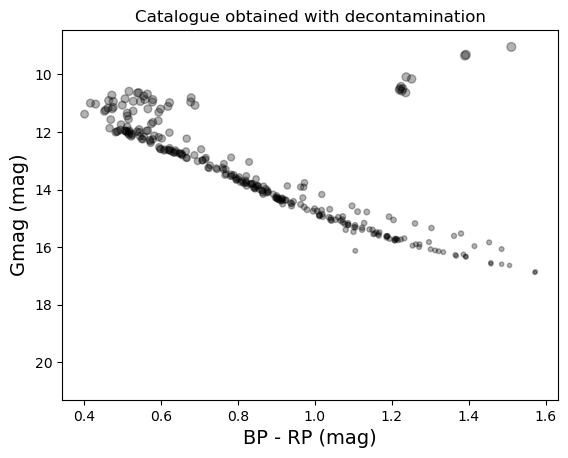

In [3]:
fig,ax = plt.subplots(sharex=True,sharey=True)

ax.set_title('Catalogue obtained with decontamination')
ax.scatter(pop1['BP-RP'],pop1.Gmag, s=(19-pop1.Gmag)*4,c='k', alpha=0.3)
ax.set_xlabel('BP - RP (mag)',fontsize=14)
ax.set_ylabel('Gmag (mag)',fontsize=14)
ax.invert_yaxis()


### Adjusting the isochrones

In [4]:
#reading the table of isochrones
iso = ascii.read("Catalogues/isochrones.csv")

In [5]:
kk, = np.where(iso["logAge"] == 8.95001)  #binaries
jj, = np.where(iso["logAge"] == 9.00001)
ll, = np.where(iso["logAge"] == 9.05001)  #turn

iso_sel1 = iso[kk]
iso_sel2 = iso[jj]
iso_sel3 = iso[ll]

In [6]:
EBV = 0.124
AV = 3.1 * EBV

# Modulo da distancia em Mpc modificado de Sun. et al 2019 (https://iopscience.iop.org/article/10.3847/1538-4357/ab16e4)
Md = 9.6

DY = Md + 0.8363*AV
DX = (1.083-0.634)*AV

Text(0.5, 0, '$G_{BP}-G_{RP}$ (mag)')

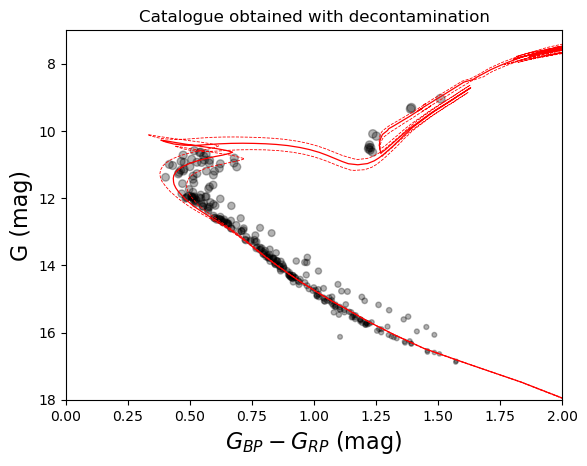

In [7]:
fig, ax = plt.subplots()
ax.set_title("Catalogue obtained with decontamination")
ax.scatter(pop1['BP-RP'],pop1.Gmag, s=(19-pop1.Gmag)*4,c='k', alpha=0.3)
ax.plot((iso_sel1['G_BPmag']-iso_sel1['G_RPmag']) + DX, iso_sel1["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)
ax.plot((iso_sel2['G_BPmag']-iso_sel2['G_RPmag']) + DX, iso_sel2["Gmag"] + DY, color='r',linewidth=0.9)
ax.plot((iso_sel3['G_BPmag']-iso_sel3['G_RPmag']) + DX, iso_sel3["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)

ax.set_xlim(0, 2.0)
ax.set_ylim(18, 7)
ax.set_ylabel(r"G (mag)",fontsize=16)
ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)",fontsize=16)